In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
DATASET_DIR = './char_dataset/'
IMG_SIZE = (28, 28)

def load_dataset():
    X, y = [], []
    label_map = {char: idx for idx, char in enumerate(sorted(os.listdir(DATASET_DIR)))}
    
    for char, label in label_map.items():
        char_dir = os.path.join(DATASET_DIR, char)
        for file in os.listdir(char_dir):
            img_path = os.path.join(char_dir, file)
            img = Image.open(img_path).convert('L')  # grayscale
            img = img.resize(IMG_SIZE)
            img_array = np.array(img) / 255.0        # normalize
            X.append(img_array)
            y.append(label)
    
    return np.array(X), np.array(y), label_map

X, y, label_map = load_dataset()
X = X.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
y_cat = to_categorical(y, num_classes=26)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

print(f"Loaded {X.shape[0]} images.")

Loaded 7800 images.


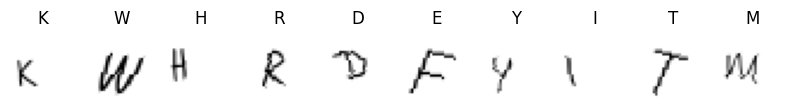

In [5]:
def show_sample_images(X, y, label_map, count=10):
    inv_label_map = {v: k for k, v in label_map.items()}
    plt.figure(figsize=(10, 2))
    for i in range(count):
        plt.subplot(1, count, i+1)
        plt.imshow(X[i].reshape(IMG_SIZE), cmap='gray')
        plt.title(inv_label_map[np.argmax(y[i])])
        plt.axis('off')
    plt.show()

show_sample_images(X_train, y_train, label_map)

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

D:\WorkShit\Dictation-Tutor\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0650 - loss: 3.2045 - val_accuracy: 0.2804 - val_loss: 2.4313
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3963 - loss: 1.9834 - val_accuracy: 0.5921 - val_loss: 1.2922
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6669 - loss: 1.0662 - val_accuracy: 0.7524 - val_loss: 0.7893
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8017 - loss: 0.6465 - val_accuracy: 0.7901 - val_loss: 0.6430
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8628 - loss: 0.4567 - val_accuracy: 0.8550 - val_loss: 0.4622
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9067 - loss: 0.3245 - val_accuracy: 0.8966 - val_loss: 0.3526
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9286 - loss: 0.2346 - val_accuracy: 0.8822 - val_loss: 0.3602
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9503 - loss: 0.1846 - val_accuracy: 0.

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8845 - loss: 0.3764
Test Accuracy: 0.8788


### Test Run

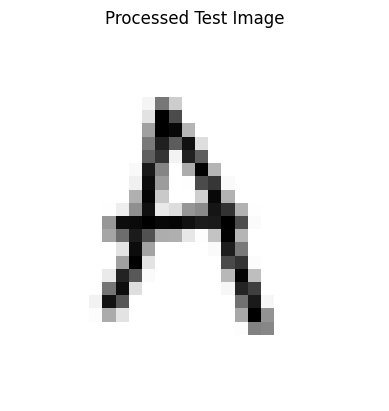

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = Image.open(img_path).convert('L')  # convert to grayscale
    img = img.resize((28, 28))              # resize to 28x28
    img = np.array(img)

    # Invert colors if the background is darker than the character
    if np.mean(img) < 127:
        img = 255 - img

    img = img / 255.0                       # normalize
    img = img.reshape(1, 28, 28, 1)         # reshape for model
    return img

test_img_path = "test.png"
processed_img = preprocess_image(test_img_path)

# Visualize it
plt.imshow(processed_img[0].reshape(28, 28), cmap='gray')
plt.title("Processed Test Image")
plt.axis('off')
plt.show()

In [10]:
# Predict
prediction = model.predict(processed_img)
predicted_index = np.argmax(prediction)
predicted_char = list(label_map.keys())[list(label_map.values()).index(predicted_index)]

print(f"Predicted character: {predicted_char}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted character: M
